<p style="text-align: right;">
 <img src="https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcQWwhLsJ3D-RF2wSL1w2Zl8z6DYSAs4vcqmQxYnELC0rwxX06HJ" alt="Logo EPN" width="100" height="100" style="float: right;">
<center><span style="font-size: 26px; font-weight: bold;">ESCUELA POLITÉCNICA NACIONAL</span></center>
<center><span style="font-size: 26px; font-weight: bold;">MÉTODOS NUMÉRICOS</span></center>

<h3 style="font-size: 20px;"><span style="float:left">Leandro Bravo</span> <span style="float:right">GR1CC</span></h3><br>
<h3 style="font-size: 16px;"><span style="float:left">CONJUNTO DE EJERCICIOS</span></h3> 

# Frontera natural

In [3]:
import sympy as sym
from IPython.display import display
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    points = sorted(zip(xs, ys), key=lambda x: x[0]) #ordenar puntos por x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  #Número de splines
    h = [xs[i + 1] - xs[i] for i in range(n)] #distancias entre xs contiguas

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i]*(ys[i+1] - ys[i])-3 / h[i-1]*(ys[i] - ys[i-1])
    l = [1]
    u = [0]
    z = [0]
    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)
    b = [0] * n
    d = [0] * n
    a = [0] * n
    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b[j] = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        a[j] = ys[j]
        S = a[j] + b[j]*(x - xs[j]) + c[j]*(x - xs[j])**2 + d[j]*(x - xs[j])**3
        splines.append(S)
    splines.reverse()
    return splines

    points = sorted(zip(xs, ys), key=lambda x: x[0])  #ordenar puntos por x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  #Número de splines
    h = [xs[i + 1] - xs[i] for i in range(n)] #distancias entre xs contiguas

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i]*(ys[i+1]-ys[i])-3 / h[i-1]*(ys[i]-ys[i-1])
    l = [1]
    u = [0]
    z = [0]
    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]] 
    l.append(1)
    z.append(0)
    c = [0] * (n + 1)
    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j] 
        print(j, a, b, c[j], d)
        S = a + b*(x - xs[j]) + c[j]*(x - xs[j])**2 + d*(x - xs[j])**3
        splines.append(S)
    splines.reverse()
    return splines

# Frontera condicionada

In [5]:
import sympy as sym

def cubic_spline_clamped(xs: list[float], ys: list[float],
                         d0: float, dn: float)->list[sym.Symbol]:
    points = sorted(zip(xs, ys), key=lambda x: x[0]) #ordenar puntos por x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1 #Número de splines
    h = [xs[i + 1] - xs[i] for i in range(n)] #distancias entre xs contiguas

    alpha = [0] * (n + 1)
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * d0
    alpha[-1] = 3 * dn - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i]*(ys[i+1]-ys[i])-3 / h[i-1]*(ys[i]-ys[i-1])
    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)
    b = [0] * n
    d = [0] * n
    a = [0] * n
    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b[j] = (ys[j + 1] - ys[j]) / h[j] - h[j]*(c[j + 1] + 2 *c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3*h[j])
        a[j] = ys[j]
        S = a[j] + b[j]*(x-xs[j]) + c[j]*(x - xs[j])**2 + d[j]*(x - xs[j])**3
        splines.append(S)
    splines.reverse()
    return splines

--------------------------------

1) Dados los puntos $(0,1)$, $(1,5)$, $(2,3)$, determine el spline cúbico. 

In [417]:
xs = [0, 1, 2]
ys = [1, 5, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

______


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

2. Dados los puntos $(-1,1)$, $(1,3)$, determine el spline cúbico sabiendo que $f'(x_0) = 1$, $f'(x_n) = 2$.

In [420]:
xs = [-1, 1]
ys = [1, 3]
d0 = 1
dn = 2

splines = cubic_spline_clamped(xs=xs, ys=ys, d0=d0, dn=dn)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1.0*x + 2.0

______


1.0*x + 2.0

3. Usando la función anterior, encuentre el spline cúbico para: $xs = [1, 2, 3]$, $ys = [2, 3, 5]$.

In [423]:
xs = [1, 2, 3]
ys = [2, 3, 5]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

0.75*x + 0.25*(x - 1)**3 + 1.25

1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2

______


0.25*x**3 - 0.75*x**2 + 1.5*x + 1.0

-0.25*x**3 + 2.25*x**2 - 4.5*x + 5.0

4. Usando la función anterior, encuentre el spline cúbico para: $xs = [0, 1, 2, 3]$, $ys = [-1 ,1, 5, 2]$.

In [426]:
xs = [0, 1, 2, 3]
ys = [-1 ,1, 5, 2]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

5. Use la función cubic_spline_clamped, provista en el enlace de Github, para graficar los datos de la siguiente tabla.   
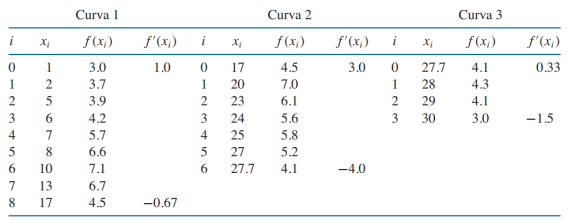

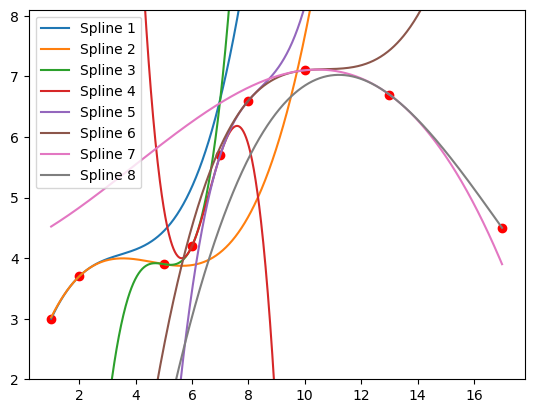

In [428]:
# Curva 1
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

# Definir los puntos a interpolar y las derivadas en el primer y último punto
xs = [1, 2, 5, 6, 7, 8, 10, 13, 17]  
ys = [3, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5] 
d0 = 1 
dn = -0.67 

# Definir x como una variable simbólica
x = sym.Symbol('x')

# Llamar a la función cubic_spline_clamped
splines = cubic_spline_clamped(xs, ys, d0, dn)

# Crear una gráfica para cada spline
x_vals = np.linspace(min(xs), max(xs), 1000)
for i, spline in enumerate(splines):
    y_vals = [spline.subs(x, val) for val in x_vals]
    plt.plot(x_vals, y_vals, label=f'Spline {i+1}')

# Mostrar la gráfica
plt.scatter(xs, ys, color='red')
plt.ylim(min(ys)-1, max(ys)+1)
plt.legend()
plt.show()

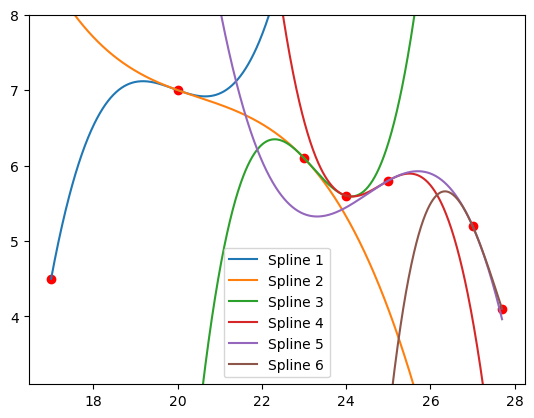

In [429]:
# Curva 2
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

# Definir los puntos a interpolar y las derivadas en el primer y último punto
xs = [17, 20, 23, 24, 25, 27, 27.7]  
ys = [4.5, 7, 6.1, 5.6, 5.8, 5.2, 4.1] 
d0 = 3
dn = -4 

# Definir x como una variable simbólica
x = sym.Symbol('x')

# Llamar a la función cubic_spline_clamped
splines = cubic_spline_clamped(xs, ys, d0, dn)

# Crear una gráfica para cada spline
x_vals = np.linspace(min(xs), max(xs), 1000)
for i, spline in enumerate(splines):
    y_vals = [spline.subs(x, val) for val in x_vals]
    plt.plot(x_vals, y_vals, label=f'Spline {i+1}')

# Mostrar la gráfica
plt.scatter(xs, ys, color='red')
plt.ylim(min(ys)-1, max(ys)+1)
plt.legend()
plt.show()

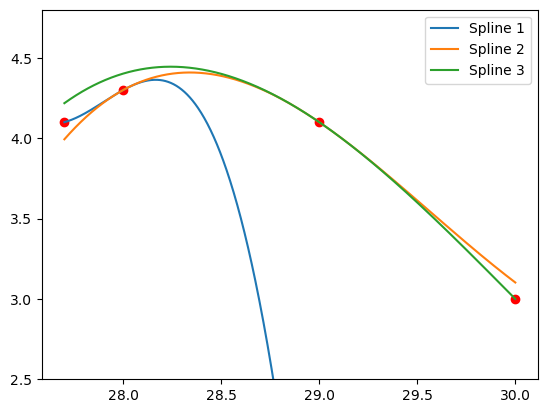

In [457]:
# Curva 3
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

# Definir los puntos a interpolar y las derivadas en el primer y último punto
xs = [27.7, 28, 29, 30]  
ys = [4.1, 4.3, 4.1, 3] 
d0 = 0.33
dn = -1.5

# Definir x como una variable simbólica
x = sym.Symbol('x')

# Llamar a la función cubic_spline_clamped
splines = cubic_spline_clamped(xs, ys, d0, dn)

# Crear una gráfica para cada spline
x_vals = np.linspace(min(xs), max(xs), 1000)
for i, spline in enumerate(splines):
    y_vals = [spline.subs(x, val) for val in x_vals]
    plt.plot(x_vals, y_vals, label=f'Spline {i+1}')

# Mostrar la gráfica
plt.scatter(xs, ys, color='red')
plt.ylim(min(ys)-0.5, max(ys)+0.5)
plt.legend()
plt.show()

In [7]:
xs = [-1, 0, 1, 2]
ys = [-1 , 1, 5, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1.06666666666667*x + 0.933333333333333*(x + 1)**3 + 0.0666666666666669

-2.66666666666667*x**3 + 2.8*x**2 + 3.86666666666667*x + 1

1.46666666666667*x + 1.73333333333333*(x - 1)**3 - 5.2*(x - 1)**2 + 3.53333333333333

______


0.933333333333333*x**3 + 2.8*x**2 + 3.86666666666667*x + 1.0

-2.66666666666667*x**3 + 2.8*x**2 + 3.86666666666667*x + 1

1.73333333333333*x**3 - 10.4*x**2 + 17.0666666666667*x - 3.4